<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مشارکت در کلاس
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین نرخ مشارکت دانشجویان یک دوره‌ی آموزشی آنلاین در قالب یک فایل csv به شما داده شده است.
نرخ مشارکت بیانگر نسبت مدت زمان تماشای ویدئوی آموزشی توسط هر دانشجو به کل مدت زمان آموزش است.
نخست داده‌ها را از فایل 
<code>Engagement_ratio.csv</code>
بخوانید و در متغیر <code>data</code> بریزید.
</font>
</p>

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('Engagement_ratio.csv', delimiter=',')
print(data)

[0.00014921 0.03204704 0.07161051 ... 0.12606084 0.09834898 0.00127969]


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
میانگین و انحراف از میانگین این جمعیت را حساب کنید.
</font>
</p>

In [3]:
mean_pop = np.mean(data)
std_pop = np.std(data)



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون ۱۰۰۰ مرتبه نمونه‌گیری به اندازه‌ی ۳۰ عدد از جمعیت بگیرید و به سوالاتی که در ادامه پرسیده می‌شود پاسخ دهید. 
</font>
</p>

In [4]:
sample_means = []
for _ in range(1000):
    sample = np.random.choice(data, size=30)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
میانگین و انحراف از معیار هر ست از نمونه‌ها را محاسبه کرده و در متغیر‌های
<code>mean_sample_set</code>
و
<code>std_sample_set</code>
ذخیره کنید.
</font>
</p>

In [5]:
mean_sample_set = np.mean(sample_means)
std_sample_set = np.std(sample_means)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 هیستوگرام توزیع نمونه‌‌ها در ۱۰ نمونه‌برداری اول را در قالب ۱۰ تصویر رسم نمایید. 

</font>
</p>

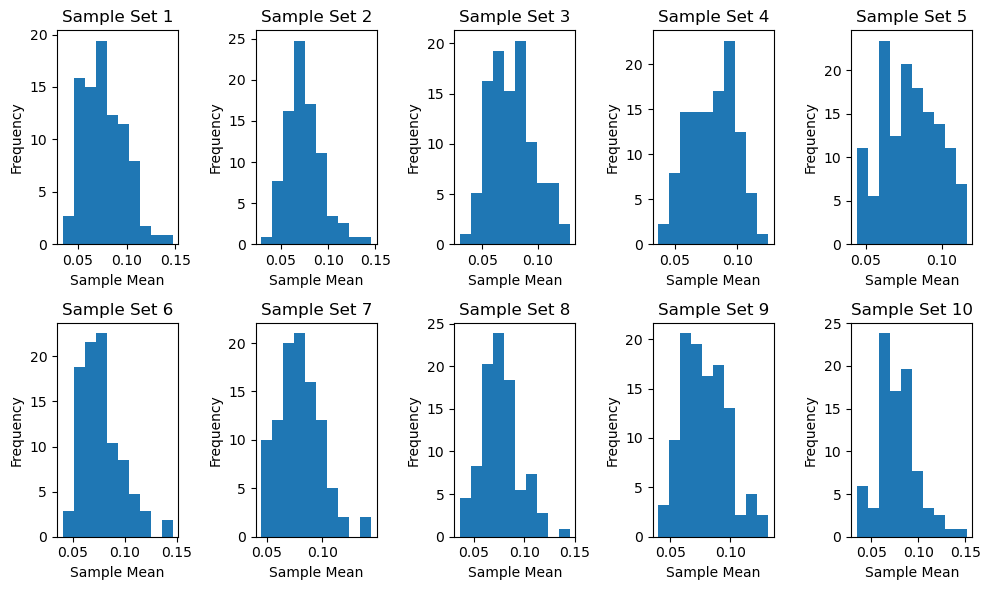

In [6]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.hist(sample_means[i*100:(i+1)*100], bins=10, density=True)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title("Sample Set " + str(i+1))
plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون هیستوگرام توزیع میانگین تمامی ۱۰۰۰ نمونه‌برداری‌ را در یک تصویر رسم نمایید. آیا تصویر به‌دست آمده قابل پیش‌بینی بود؟
</font>
</p>

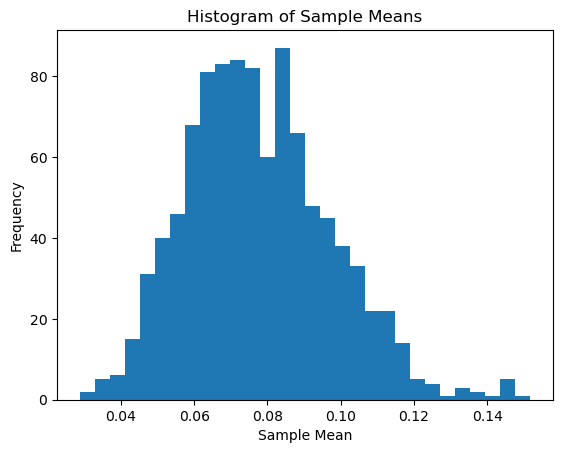

In [7]:
plt.hist(sample_means, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means")
plt.show()



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تقریبا ۹۵ درصد میانگین نمونه‌ها در چه بازه‌ای قرار می‌گیرد؟ (توجه: این تقریب را بر اساس نرمال فرض کردن توزیع این نمونه‌ها درنظر می‌گیریم.)</font>
</p>

In [8]:
# 95% of sample means fall in this interval
# z_score = sp.norm.ppf(0.975) = 1.96
interval = 1.96*std_pop/np.sqrt(30)

lower, upper = mean_pop - interval, mean_pop + interval
print(f"95% interval: [{lower:.2f}, {upper:.2f}]")

95% interval: [0.04, 0.12]



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بازه‌ی اطمینان ۹۵ درصد در قسمت قبل را با استفاده از z-table محاسبه کنید.
</font>
</p>


In [9]:
# Calculate CI manually
lower_manual = mean_pop - 1.96*std_pop/np.sqrt(30)
upper_manual = mean_pop + 1.96*std_pop/np.sqrt(30)

in_range = 0
for mn in sample_means:
    if lower_manual < mn < upper_manual:
        in_range += 1
percentages = in_range/1000*100
print(f"{percentages:.2f}% within CI")

96.00% within CI


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای هر ۱۰۰۰ نمونه‌گیری صورت گرفته در بالا(بخش اول)، بازه‌ی اطمینان ۹۵ درصد را حساب کنید. درصد تعداد نمونه‌هایی که میانگین جمعیت در بازه‌ی اطمینان ۹۵ درصد آن‌ها(نمونه‌ها) در بازه‌ی بدست آمده بوده‌اند را گزارش کنید.
</font>
</p>


In [10]:
smpls_out = np.mean((sample_means >= lower) & (sample_means <= upper))
print(smpls_out)
smpls_out_means = np.mean(sample_means)
print(smpls_out_means)

0.96
0.07760777659764599


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تمامی خواسته‌های بخش اول را این بار با نمونه‌هایی با اندازه ۲۰۰ سمپل تکرار کنید و نتایج را مقایسه کنید.
</font>
</p>

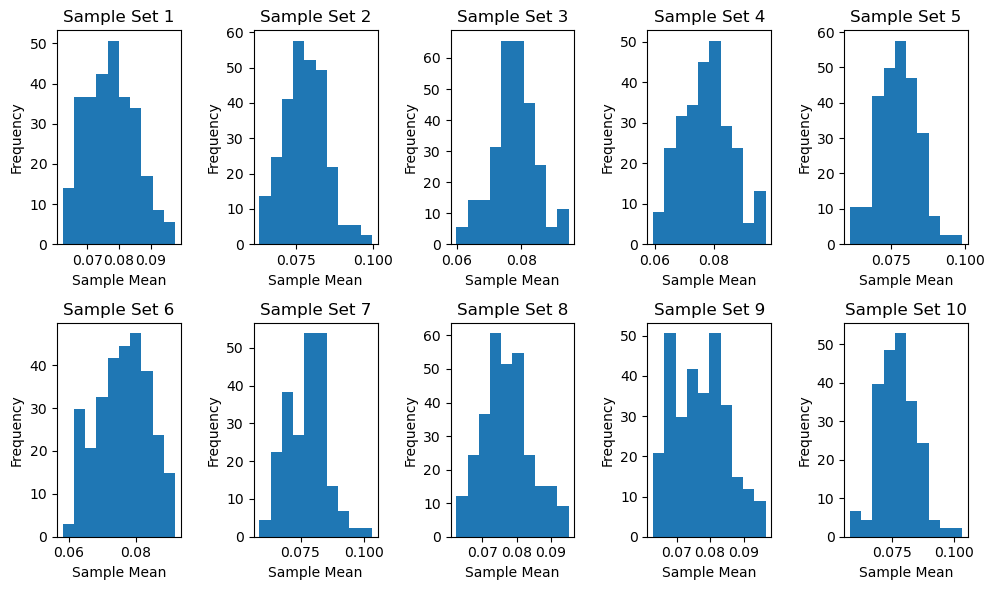

In [11]:
sample_means_200 = []
for _ in range(1000):
    sample_200 = np.random.choice(data, size=200)
    sample_mean_200 = np.mean(sample_200)
    sample_means_200.append(sample_mean_200)

mean_sample_set_200 = np.mean(sample_means_200)
std_sample_set_200 = np.std(sample_means_200)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.hist(sample_means_200[i*100:(i+1)*100], bins=10, density=True)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title("Sample Set " + str(i+1))
plt.tight_layout()
plt.show()

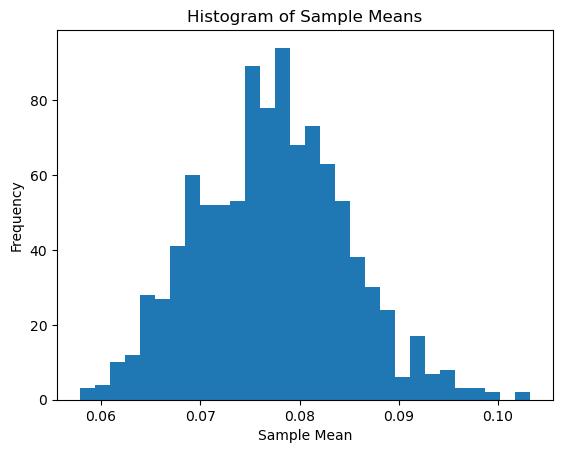

In [12]:
plt.hist(sample_means_200, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means")
plt.show()

In [13]:
# Calculate the z-score for a 95% confidence interval
z_200 = sp.norm.ppf(0.975)
sample_size_200 = 200
# Calculate the lower and upper bounds of the confidence interval
lower_bound_200 = mean_pop - z_200 * (std_pop / np.sqrt(sample_size_200))
upper_bound_200 = mean_pop + z_200 * (std_pop / np.sqrt(sample_size_200))

print("Approximately 95% of sample means with sample size 30 fall within the interval: [{:.2f}, {:.2f}]".format(lower_bound_200, upper_bound_200))

# Calculate the t-score for a 95% confidence interval
t_score_200 = sp.t.ppf(0.975, df=sample_size_200-1)

# Calculate the standard error of the sample means
standard_error_200 = std_pop

Approximately 95% of sample means with sample size 30 fall within the interval: [0.06, 0.09]


In [14]:
smpls_out_200 = np.mean((sample_means_200 >= lower_bound_200) & (sample_means_200 <= upper_bound_200))
print(smpls_out_200)
smpls_out_means_200 = np.mean(sample_means_200)
print(smpls_out_means_200)

0.951
0.07725023442961557


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش سوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
درس جدیدی آماده کرده‌ایم که شامل ۶۰ دقیقه ویدیو است. می‌خواهیم این درس را در دوره‌ی آموزشی دانشجویان بگنجانیم. اما در این درس تغییر استراتژی داده‌ایم و می‌خواهیم ببینیم این تغییر نرخ مشارکت را بیشتر می‌کند یا نه. 
به ۲۰ دانشجو آن را عرضه کرده‌ایم و میانگین نرخ مشارکت آن‌ها ۰.۱۳ بود. 
اگر بخواهیم این درس را برای همه دانشجویان این جمعیت آماده کنیم، برآورد نقطه‌ای و بازه‌ای شما برای نرخ مشارکت دانشجویان بر اساس نمونه‌ای با اندازه‌ی ۲۰ چقدر است؟ پاسخ شما باید برای حداقل ۹۸ درصد جمعیت معتبر باشد.
</font>
</p>

In [15]:
sample_mean_3 = 0.13
sample_std_3 = data.std()
sample_size_3 = 20

lower_bound_3 = sample_mean_3 - 2.33*sample_std_3/np.sqrt(sample_size_3)
upper_bound_3 = sample_mean_3 + 2.33*sample_std_3/np.sqrt(sample_size_3)

confidence_3 = 0.98
z_3 = sp.norm.ppf(1-((1-confidence_3)/2))
margin_of_error_3 = z_3 * sample_std_3/np.sqrt(sample_size_3)

interval_3 = (sample_mean_3 - margin_of_error_3, sample_mean_3 + margin_of_error_3)
print(interval_3)

print('Point estimate for the engagement rate:', sample_mean_3)
print('98% confidence interval for the engagement rate:', (lower_bound_3, upper_bound_3))

if lower_bound_3 > mean_pop:
    print('Yes, the strategy change has likely increased the engagement rate.')
else:
    print('No, we cannot claim that the strategy change has increased the engagement rate.')

(0.07423095682364741, 0.1857690431763526)
Point estimate for the engagement rate: 0.13
98% confidence interval for the engagement rate: (0.07414340518419804, 0.18585659481580197)
No, we cannot claim that the strategy change has increased the engagement rate.


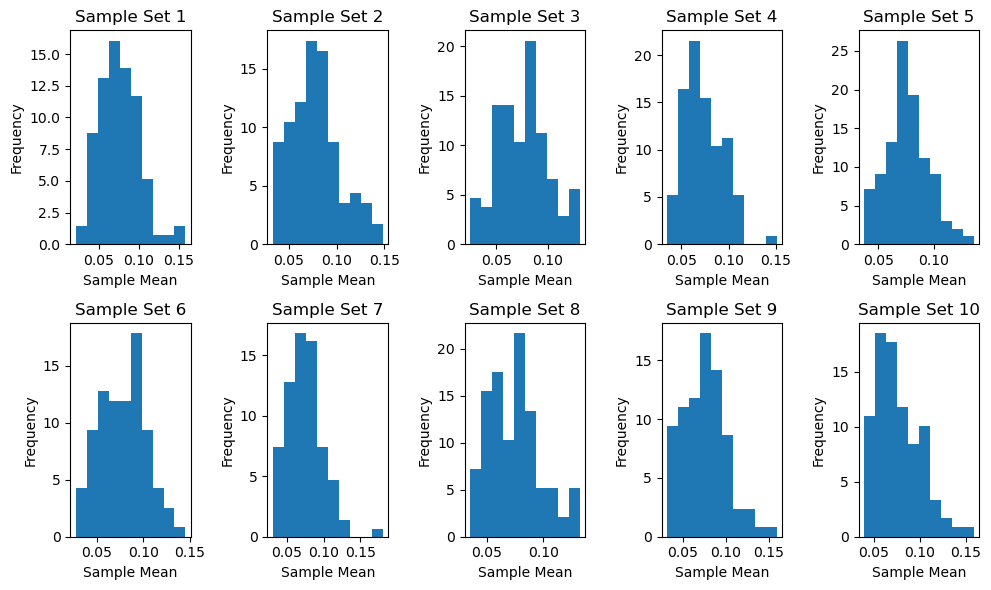

In [16]:
sample_means_3 = []
for _ in range(1000):
    sample_3 = np.random.choice(data, size=20)
    sample_mean_3 = np.mean(sample_3)
    sample_means_3.append(sample_mean_3)

mean_sample_set_3 = np.mean(sample_means_3)
std_sample_set_3 = np.std(sample_means_3)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.hist(sample_means_3[i*100:(i+1)*100], bins=10, density=True)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title("Sample Set " + str(i+1))
plt.tight_layout()
plt.show()

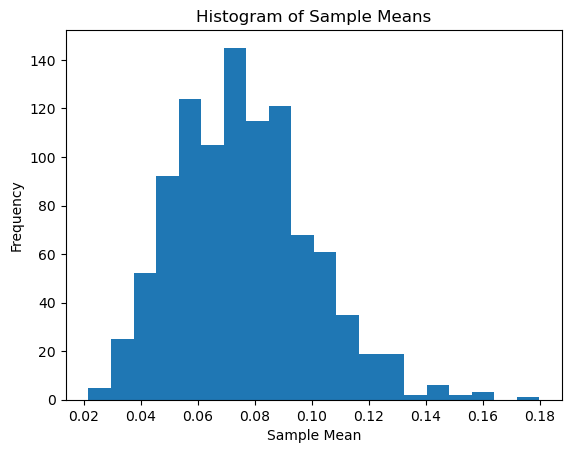

In [17]:
plt.hist(sample_means_3, bins=20)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means")
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به این بررسی‌ها، آیا می‌توانیم ادعا کنیم که تغییر استراتژی ما در ارایه این درس، نرخ مشارکت را بیشتر می‌کند؟

</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [18]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["class_participation.ipynb"]

compress(file_names)

File Paths:
['class_participation.ipynb']
